# Defining Unet with python

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
# Import the helper functions
from helper_functions import plot_loss_curves, unzip_data, compare_historys, walk_through_dir

--2024-11-06 09:30:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-11-06 09:30:26 (14.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# This is just how the Main model is created
# All the given data are imaginary

IMG_WIDTH = 128
IMG_HEIHGT = 128
IMG_CHANNELS = 3
IMG_SIZE  = (128, 128, 3)

In [ ]:
# Model sumary()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Rescaling (Lambda)        │ (None, 128, 128, 3)    │              0 │ Input_Layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_1_1 (Conv2D)       │ (None, 128, 128, 16)   │            448 │ Rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ DropOut_1 (Dropout)       │ (None, 128, 128, 16)   │              0 │ Conv2D_1_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_1_2 (Conv2D)       │ (None, 128, 128, 16)   │          2,320 │ DropOut_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_1               │ (None, 64, 64, 16)     │              0 │ Conv2D_1_2[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_2_1 (Conv2D)       │ (None, 64, 64, 32)     │          4,640 │ MaxPool2D_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ DropOut_2 (Dropout)       │ (None, 64, 64, 32)     │              0 │ Conv2D_2_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_2_2 (Conv2D)       │ (None, 64, 64, 32)     │          9,248 │ DropOut_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_2               │ (None, 32, 32, 32)     │              0 │ Conv2D_2_2[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_3_1 (Conv2D)       │ (None, 32, 32, 64)     │         18,496 │ MaxPool2D_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ DropOut_3 (Dropout)       │ (None, 32, 32, 64)     │              0 │ Conv2D_3_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_3_2 (Conv2D)       │ (None, 32, 32, 64)     │         36,928 │ DropOut_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_3               │ (None, 16, 16, 64)     │              0 │ Conv2D_3_2[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_4_1 (Conv2D)       │ (None, 16, 16, 128)    │         73,856 │ MaxPool2D_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ DropOut_4 (Dropout)       │ (None, 16, 16, 128)    │              0 │ Conv2D_4_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv2D_4_2 (Conv2D)       │ (None, 16, 16, 128)    │        147,584 │ DropOut_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ MaxPool2D_4               │ (None, 8, 8, 128)      │              0 │ Conv2D_4_2[0][0]       │
│ (MaxPooling2D)       

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Making the Checkpoints
import wandb
from wandb.integration.keras import WandbCallback

# Initialize your W&B run (customize project name and other parameters as needed)
wandb.init(project="U_net", name = "1st_Run")

# Making Model Checkkpoint
checkpoint_path = "/content/checkpoint_history.keras"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                  save_best_only = True,
                                                  verbose= 1)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience= 3, monitor = "val_loss"),
    checkpointer,
    WandbCallback()
]

In [ ]:
# Getting the data ready
!wget "https://github.com/kamalkraj/DATA-SCIENCE-BOWL-2018/raw/refs/heads/master/data/stage1_train.zip"
!wget "https://github.com/kamalkraj/DATA-SCIENCE-BOWL-2018/raw/refs/heads/master/data/stage1_test.zip"


--2024-11-06 09:30:30--  https://github.com/kamalkraj/DATA-SCIENCE-BOWL-2018/raw/refs/heads/master/data/stage1_train.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kamalkraj/DATA-SCIENCE-BOWL-2018/refs/heads/master/data/stage1_train.zip [following]
--2024-11-06 09:30:31--  https://raw.githubusercontent.com/kamalkraj/DATA-SCIENCE-BOWL-2018/refs/heads/master/data/stage1_train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82923446 (79M) [application/zip]
Saving to: ‘stage1_train.zip.1’

stage1_train.zip.1  100%[===================>]  79.08M   341MB/s    in 0.2s    

2024-11-06 09:30:33 (

In [ ]:
# Unzip the file
import zipfile
zip_ref = zipfile.ZipFile("/content/stage1_train.zip", "r")
zip_ref.extractall("/content/train_data")
zip_ref.close()

# Test data
zip_ref = zipfile.ZipFile("/content/stage1_test.zip", "r")
zip_ref.extractall("/content/test_data")
zip_ref.close()

In [ ]:
# Let's Visualize the data
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
walk_through_dir("/content/train_data")

There are 670 directories and 0 images in '/content/train_data'.
There are 2 directories and 0 images in '/content/train_data/337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf'.
There are 0 directories and 51 images in '/content/train_data/337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf/masks'.
There are 0 directories and 1 images in '/content/train_data/337b6eed0726f07531cd467cd62b6676c31a8c9e716bdbc49433986c022252cf/images'.
There are 2 directories and 0 images in '/content/train_data/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd'.
There are 0 directories and 18 images in '/content/train_data/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd/masks'.
There are 0 directories and 1 images in '/content/train_data/58406ed8ef944831c413c3424dc2b07e59aef13eb1ff16acbb3402b38b5de0bd/images'.
There are 2 directories and 0 images in '/content/train_data/79dfcbc9361edd3a1ffe81a5bdaa22a197ad1341f3fa64b86a646c2607d6b324'.
There are 0

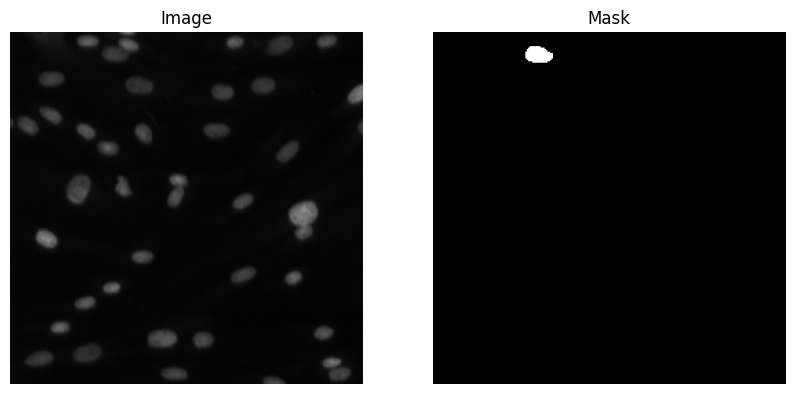

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get a random subfolder from the 'train_data' folder
folder_path = os.path.join("/content/train_data", random.choice(os.listdir("/content/train_data")))

# Construct the path to the 'images' and 'masks' subfolders
images_folder = os.path.join(folder_path, "images")
masks_folder = os.path.join(folder_path, "masks")

# Assuming there's only one image and one mask in each subfolder
image_file = os.listdir(images_folder)[0]  # Get the only file in the 'images' folder
mask_file = os.listdir(masks_folder)[0]    # Get the only file in the 'masks' folder

# Construct the full paths to the image and mask files
image_path = os.path.join(images_folder, image_file)
mask_path = os.path.join(masks_folder, mask_file)

# Load the image and mask
img_new = mpimg.imread(image_path)
mask_new = mpimg.imread(mask_path)

# Display the image and mask side by side
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img_new)
plt.title("Image")
plt.axis("off")

# Display the mask
plt.subplot(1, 2, 2)
plt.imshow(mask_new, cmap="gray")  # You can set colormap to 'gray' if it's a binary mask
plt.title("Mask")
plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import wandb
from wandb.integration.keras import WandbCallback
import zipfile
import numpy as np
import matplotlib.image as mpimg
import os
from skimage.transform import resize
from tqdm import tqdm

# Paths
train_path = "/content/train_data"
test_path = "/content/test_data"
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
IMG_SIZE = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Getting the list of IDs for train and test data
train_ids = next(os.walk(train_path))[1]
test_ids = next(os.walk(test_path))[1]

# Initialize arrays for training data and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

# Print message
print("Resizing training images and masks")

# Loop through each training image and its corresponding masks
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = os.path.join(train_path, id_)

    # Read the image
    img = mpimg.imread(os.path.join(path, "images", id_ + ".png"))[:, :, :IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

    # Initialize an empty mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool_)

    # Loop through each mask file and combine them
    for mask_file in next(os.walk(os.path.join(path, "masks")))[2]:
        mask_ = mpimg.imread(os.path.join(path, "masks", mask_file))
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)

    # After combining all masks, assign it to y_train
    y_train[n] = mask

# Model definition
Inputs = tf.keras.layers.Input(shape=IMG_SIZE, name="Input_Layer")

# Rescaling to Float
x = tf.keras.layers.Lambda(lambda x: x / 255., name="Rescaling")(Inputs)

# Contraction Path
# First Convolutional layer
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_1_1")(x)
c1 = tf.keras.layers.Dropout(0.1, name="DropOut_1")(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_1_2")(c1)
p1 = tf.keras.layers.MaxPool2D((2, 2), name="MaxPool2D_1")(c1)

# Second layer
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_2_1")(p1)
c2 = tf.keras.layers.Dropout(0.1, name="DropOut_2")(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_2_2")(c2)
p2 = tf.keras.layers.MaxPool2D((2, 2), name="MaxPool2D_2")(c2)

# Third layer
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_3_1")(p2)
c3 = tf.keras.layers.Dropout(0.2, name="DropOut_3")(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_3_2")(c3)
p3 = tf.keras.layers.MaxPool2D((2, 2), name="MaxPool2D_3")(c3)

# Fourth layer
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_4_1")(p3)
c4 = tf.keras.layers.Dropout(0.2, name="DropOut_4")(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_4_2")(c4)
p4 = tf.keras.layers.MaxPool2D((2, 2), name="MaxPool2D_4")(c4)

# Fifth layer (Middle Layer)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_5_1")(p4)
c5 = tf.keras.layers.Dropout(0.3, name="DropOut_5")(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_5_2")(c5)

# Sixth layer
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding="same", name="UpSampling_6")(c5)
u6 = tf.keras.layers.concatenate([u6, c4], axis=3)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_6_1")(u6)
c6 = tf.keras.layers.Dropout(0.2, name="DropOut_6")(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_6_2")(c6)

# Seventh layer
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding="same", name="UpSampling_7")(c6)
u7 = tf.keras.layers.concatenate([u7, c3], axis=3)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_7_1")(u7)
c7 = tf.keras.layers.Dropout(0.1, name="DropOut_7")(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_7_2")(c7)

# Eighth layer
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding="same", name="UpSampling_8")(c7)
u8 = tf.keras.layers.concatenate([u8, c2], axis=3)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_8_1")(u8)
c8 = tf.keras.layers.Dropout(0.1, name="DropOut_8")(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_8_2")(c8)

# Ninth layer
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding="same", name="UpSampling_9")(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_9_1")(u9)
c9 = tf.keras.layers.Dropout(0.1, name="DropOut_9")(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same", name="Conv2D_9_2")(c9)

# Output layer
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation="sigmoid", name="Output_Layer")(c9)

# Model definition
model = tf.keras.Model(inputs=[Inputs], outputs=[outputs])

# Model sumary()
model.summary()

Resizing training images and masks


100%|██████████| 670/670 [04:11<00:00,  2.67it/s]


(array([[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         ...,
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
 
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],
 
 
        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0

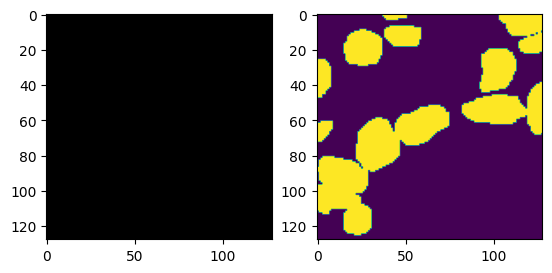

In [ ]:
image_x = random.randint(0, len(train_ids))
plt.subplot(1, 2, 1)
plt.imshow(X_train[image_x]);

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(y_train[image_x]));

In [110]:
# Making Model Checkkpoint
checkpoint_path = "/content/checkpoint_history.keras"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                  save_best_only = True,
                                                  verbose= 1)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience= 3, monitor = "val_loss"),
    checkpointer
]
# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_split=0.2,
                    verbose=1,
                    callbacks=[checkpointer])



Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.7653 - loss: 0.6833
Epoch 1: val_loss improved from inf to 0.57906, saving model to /content/checkpoint_history.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 550ms/step - accuracy: 0.7650 - loss: 0.6826 - val_accuracy: 0.7383 - val_loss: 0.5791
Epoch 2/20
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7542 - loss: 0.5673
Epoch 2: val_loss improved from 0.57906 to 0.57702, saving model to /content/checkpoint_history.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7543 - loss: 0.5671 - val_accuracy: 0.7383 - val_loss: 0.5770
Epoch 3/20
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7506 - loss: 0.5683
Epoch 3: val_loss did not improve from 0.57702
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7509 - loss: 0.5681 - val_accuracy: 0.7383 - val_loss: 0.5779
Epoch 4/20
33/34 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7620 - loss: 0.5535
Epoch 4: val_loss improved from 0.57702 to 0.57671, saving mod

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


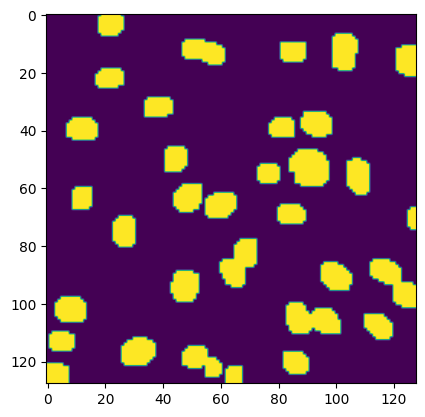

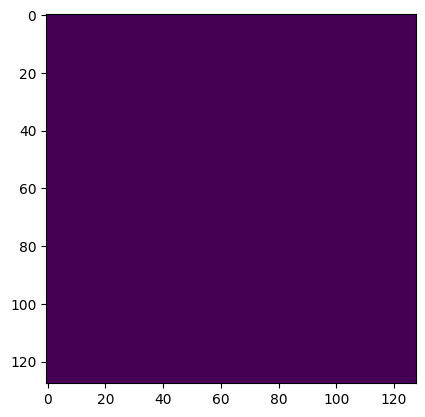

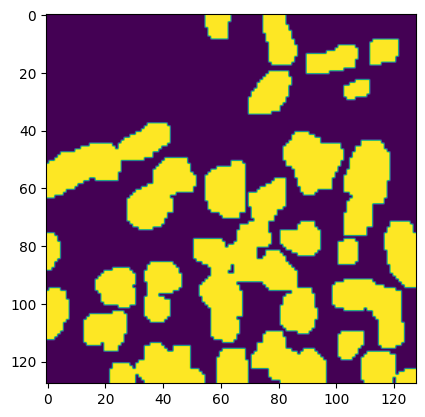

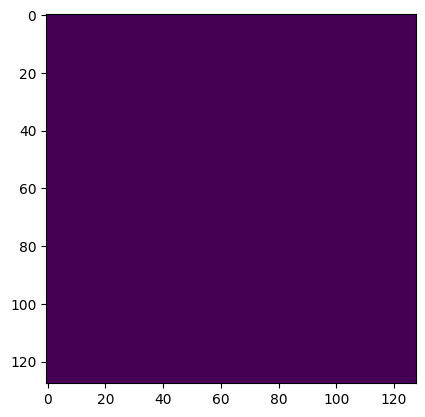

In [111]:
preds_train = model.predict(X_train[:int(X_train.shape[0]  * 0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose= 1)
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_r = (preds_test > 0.5).astype(np.uint8)

i = random.randint(0, len(preds_train_t))
plt.imshow(X_train[i])
plt.imshow(np.squeeze(y_train[i]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[i]))
plt.show()


i = random.randint(0, len(preds_val_t))
plt.imshow(X_train[int(X_train.shape[0] * 0.9):][i])
plt.imshow(np.squeeze(y_train[int(y_train.shape[0]*0.9):][i]))
plt.show()
plt.imshow(np.squeeze(preds_val_t[i]))
plt.show()